In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import string,re

import inflect
from num2words import num2words 

## Data Exploration

In [136]:
# Inpute files are present in same directory

data=pd.read_csv("en_train.csv")

In [137]:
## first few rows of data 
data.head()

,sentence_id,token_id,class,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of


In [138]:
data.rename({'class':'class_name'},axis=1,inplace=True)

In [139]:
data.head()

,sentence_id,token_id,class_name,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of


In [140]:
## checking values for each category

data.class_name.value_counts()

PLAIN         7353693
PUNCT         1880507
DATE           258348
LETTERS        152795
CARDINAL       133744
VERBATIM        78108
MEASURE         14783
ORDINAL         12703
DECIMAL          9821
MONEY            6128
DIGIT            5442
ELECTRONIC       5162
TELEPHONE        4024
TIME             1465
FRACTION         1196
ADDRESS           522
Name: class_name, dtype: int64

#### Lets check data from each category 

Print first 10 rows for each class

In [141]:
data[data.class_name=='PLAIN'].head(10)

,sentence_id,token_id,class_name,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of
5,0,5,PLAIN,plant,plant
6,0,6,PLAIN,in,in
7,0,7,PLAIN,family,family
8,0,8,PLAIN,Acanthaceae,Acanthaceae
12,1,2,PLAIN,Red,Red


In [142]:
data[data.class_name=='PUNCT'].head(10)

,sentence_id,token_id,class_name,before,after
9,0,9,PUNCT,.,.
17,1,7,PUNCT,.,.
25,2,7,PUNCT,",",","
28,2,10,PUNCT,",",","
31,2,13,PUNCT,",",","
33,2,15,PUNCT,",",","
36,2,18,PUNCT,",",","
39,2,21,PUNCT,",",","
43,2,25,PUNCT,.,.
63,3,19,PUNCT,.,.


In [143]:
data[data.class_name=='DATE'].head(10)

,sentence_id,token_id,class_name,before,after
10,1,0,DATE,2006,two thousand six
51,3,7,DATE,2007,two thousand seven
80,5,0,DATE,2008,two thousand eight
111,8,1,DATE,4 March 2014,the fourth of march twenty fourteen
147,11,1,DATE,"April 10, 2013",april tenth twenty thirteen
151,12,2,DATE,7 August 2007,the seventh of august two thousand seven
158,14,1,DATE,1987,nineteen eighty seven
211,18,12,DATE,1996,nineteen ninety six
256,22,1,DATE,22 September 2015,the twenty second of september twenty fifteen
367,29,2,DATE,"November 4, 2014",november fourth twenty fourteen


In [144]:
data[data.class_name=='LETTERS'].head(10)

,sentence_id,token_id,class_name,before,after
11,1,1,LETTERS,IUCN,i u c n
115,9,2,LETTERS,BC,b c
159,14,2,LETTERS,ALCS,a l c s
201,18,2,LETTERS,C.,c
205,18,6,LETTERS,J.,j
209,18,10,LETTERS,G.,g
224,19,1,LETTERS,U.S.,u s
317,26,8,LETTERS,LP,l p
397,31,5,LETTERS,Aceh,a c e h
399,31,7,LETTERS,Aceh,a c e h


In [145]:
data[data.class_name=='CARDINAL'].head(10)

,sentence_id,token_id,class_name,before,after
95,6,3,CARDINAL,91,ninety one
116,9,3,CARDINAL,3,three
143,10,8,CARDINAL,35,thirty five
161,14,4,CARDINAL,2,two
280,24,4,CARDINAL,3,three
426,33,10,CARDINAL,4,four
450,34,20,CARDINAL,935,nine hundred thirty five
477,38,4,CARDINAL,1065520,one million sixty five thousand five hundred t...
717,54,4,CARDINAL,9,nine
783,59,4,CARDINAL,3,three


In [146]:
data[data.class_name=='VERBATIM'].head(10)


,sentence_id,token_id,class_name,before,after
162,14,5,VERBATIM,-,-
279,24,3,VERBATIM,#,number
724,54,11,VERBATIM,&,and
980,75,2,VERBATIM,サ,サ
981,75,3,VERBATIM,イ,イ
982,75,4,VERBATIM,バ,バ
983,75,5,VERBATIM,ー,ー
984,75,6,VERBATIM,ス,ス
985,75,7,VERBATIM,レ,レ
986,75,8,VERBATIM,ッ,ッ


In [147]:

data[data.class_name=='MEASURE'].head(10)



,sentence_id,token_id,class_name,before,after
1654,130,12,MEASURE,100 m,one hundred meters
2120,167,4,MEASURE,60 km,sixty kilometers
3266,263,4,MEASURE,60%,sixty percent
4024,331,7,MEASURE,16.4%,sixteen point four percent
4032,331,15,MEASURE,57.6%,fifty seven point six percent
4996,406,7,MEASURE,79.20%,seventy nine point two o percent
5001,406,12,MEASURE,59.30%,fifty nine point three o percent
6301,511,11,MEASURE,63%,sixty three percent
7214,586,4,MEASURE,1GB,one gigabyte
8856,718,15,MEASURE,578.3/km2,five hundred seventy eight point three per squ...


In [148]:

data[data.class_name=='ORDINAL'].head(10)


,sentence_id,token_id,class_name,before,after
2231,174,7,ORDINAL,4th,fourth
5625,453,5,ORDINAL,21st,twenty first
6266,508,1,ORDINAL,V.,the fifth
7668,627,3,ORDINAL,I,the first
8085,661,16,ORDINAL,18th,eighteenth
9120,740,12,ORDINAL,19th,nineteenth
10133,829,2,ORDINAL,2nd,second
10535,864,17,ORDINAL,20th,twentieth
11662,952,12,ORDINAL,2nd,second
12040,986,9,ORDINAL,X,the tenth


In [149]:
data[data.class_name=='DECIMAL'].head(10)

,sentence_id,token_id,class_name,before,after
1058,81,4,DECIMAL,.161,point one six one
1067,81,13,DECIMAL,.6,point six
2280,179,15,DECIMAL,1.6,one point six
2449,192,7,DECIMAL,.267,point two six seven
2454,192,12,DECIMAL,.266,point two six six
2687,213,1,DECIMAL,.13,point one three
4672,381,6,DECIMAL,108.5,one hundred eight point five
6764,551,10,DECIMAL,.70,point seven o
8025,657,3,DECIMAL,1.7 million,one point seven million
8712,708,5,DECIMAL,2.42,two point four two


In [150]:
data[data.class_name=='MONEY'].head(10)

,sentence_id,token_id,class_name,before,after
1851,142,10,MONEY,"$22,750",twenty two thousand seven hundred fifty dollars
1861,142,20,MONEY,"$29,583",twenty nine thousand five hundred eighty three...
5305,432,7,MONEY,"$1,000,000",one million dollars
5311,432,13,MONEY,"$1,070,000",one million seventy thousand dollars
8727,709,6,MONEY,"$29,545",twenty nine thousand five hundred forty five d...
8729,709,8,MONEY,"$21,946",twenty one thousand nine hundred forty six dol...
15390,1256,9,MONEY,$80 million,eighty million dollars
16464,1332,8,MONEY,"$13,559",thirteen thousand five hundred fifty nine dollars
17973,1460,6,MONEY,£3.4 million,three point four million pounds
20524,1643,5,MONEY,"$36,000",thirty six thousand dollars


In [151]:
data[data.class_name=='DIGIT'].head(10)

,sentence_id,token_id,class_name,before,after
4044,332,4,DIGIT,200,two o o
5421,439,12,DIGIT,747,seven four seven
9462,769,6,DIGIT,4,four
11776,961,11,DIGIT,1665,one six six five
12297,1005,13,DIGIT,08,o eight
12299,1005,15,DIGIT,09,o nine
12447,1016,6,DIGIT,1967,one nine six seven
13551,1117,0,DIGIT,9780521843164,nine seven eight o five two one eight four thr...
15116,1237,12,DIGIT,9,nine
15121,1237,17,DIGIT,130,one three o


In [152]:
data[data.class_name=='ELECTRONIC'].head(10)

,sentence_id,token_id,class_name,before,after
3973,326,1,ELECTRONIC,::,::
3976,326,4,ELECTRONIC,::,::
5602,450,21,ELECTRONIC,animalsvoice.com,a n i m a l s v o i c e dot c o m
7914,648,2,ELECTRONIC,http://www.hkdailynews.com.hk/NewsDetail/index...,h t t p colon slash slash w w w dot h k d a i ...
10281,843,0,ELECTRONIC,Rosettacode.org,r o s e t t a c o d e dot o r g
11044,900,14,ELECTRONIC,KiliLive.com,k i l i l i v e dot c o m
11448,936,4,ELECTRONIC,Games.com,g a m e s dot c o m
12779,1049,7,ELECTRONIC,hockeydb.com,h o c k e y d b dot c o m
13469,1108,0,ELECTRONIC,TheHuffingtonPost.com,t h e h u f f i n g t o n p o s t dot c o m
15247,1246,20,ELECTRONIC,PacificWrecks.com,p a c i f i c w r e c k s dot c o m


In [153]:
data[data.class_name=='TELEPHONE'].head(10)

,sentence_id,token_id,class_name,before,after
9741,796,1,TELEPHONE,978-0-253-34916-3,nine seven eight sil o sil two five three sil ...
10307,844,17,TELEPHONE,0-8108-4934-8,o sil eight one o eight sil four nine three fo...
10675,872,12,TELEPHONE,192 1067-8,one nine two sil one o six seven sil eight
11905,973,9,TELEPHONE,978-0-646-34220-7,nine seven eight sil o sil six four six sil th...
12181,997,4,TELEPHONE,77-96925,seven seven sil nine six nine two five
15508,1260,23,TELEPHONE,0-938768-34-4,o sil nine three eight seven six eight sil thr...
16246,1317,1,TELEPHONE,0-89879-823,o sil eight nine eight seven nine sil eight tw...
16638,1348,8,TELEPHONE,3-534-01959-8,three sil five three four sil o one nine five ...
18296,1482,12,TELEPHONE,1-00-CV-788657,one sil o o sil c v sil seven eight eight six ...
18646,1508,18,TELEPHONE,0-7506-6169-0,o sil seven five o six sil six one six nine sil o


In [154]:
data[data.class_name=='TIME'].head(10)

,sentence_id,token_id,class_name,before,after
3005,243,12,TIME,3:00 pm,three p m
3007,243,14,TIME,3:00 am,three a m
4538,371,12,TIME,8 a.m.,eight a m
8320,681,7,TIME,09:45,nine forty five
34061,2705,5,TIME,02.26,two twenty six
45522,3641,7,TIME,1:00pm,one p m
71768,5776,1,TIME,3: 18,three eighteen
75210,6038,3,TIME,1pm,one p m
75212,6038,5,TIME,4pm,four p m
75215,6038,8,TIME,2pm,two p m


In [155]:
data[data.class_name=='FRACTION'].head(10)

,sentence_id,token_id,class_name,before,after
5439,441,7,FRACTION,1/2007,one two thousand seventh
13765,1133,1,FRACTION,12639/12640,twelve thousand six hundred thirty nine twelve...
23890,1914,3,FRACTION,10/59,ten fifty ninths
24795,1978,4,FRACTION,11/12,eleven twelfths
25462,2031,1,FRACTION,5/7,five sevenths
35594,2829,2,FRACTION,11/2013,eleven two thousand thirteenths
35602,2829,10,FRACTION,95/2005,ninety five two thousand fifths
42785,3415,0,FRACTION,37 / 38,thirty seven thirty eighths
43266,3452,0,FRACTION,451/452,four hundred fifty one four hundred fifty seconds
53051,4265,22,FRACTION,7½,seven and a half


In [156]:
data[data.class_name=='ADDRESS'].head(10)

,sentence_id,token_id,class_name,before,after
47812,3826,13,ADDRESS,A1,a one
122330,9802,0,ADDRESS,I00,i zero
127560,10211,14,ADDRESS,M3,m three
128408,10277,1,ADDRESS,B3,b three
154158,12370,11,ADDRESS,C2,c two
204149,16454,11,ADDRESS,A728,a seven two eight
219070,17684,9,ADDRESS,A78,a seventy eight
219076,17684,15,ADDRESS,A76,a seventy six
230747,18610,0,ADDRESS,M16,m sixteen
245174,19730,1,ADDRESS,A29091,a two nine o nine one


In [157]:
(data.class_name.value_counts()/len(data))

PLAIN         0.741416
PUNCT         0.189597
DATE          0.026047
LETTERS       0.015405
CARDINAL      0.013484
VERBATIM      0.007875
MEASURE       0.001490
ORDINAL       0.001281
DECIMAL       0.000990
MONEY         0.000618
DIGIT         0.000549
ELECTRONIC    0.000520
TELEPHONE     0.000406
TIME          0.000148
FRACTION      0.000121
ADDRESS       0.000053
Name: class_name, dtype: float64

> more than 90% of data belong to categories 'PLAIN' and 'PUNCT'. For these two categories we dont have to apply regex transformation as input and output are same



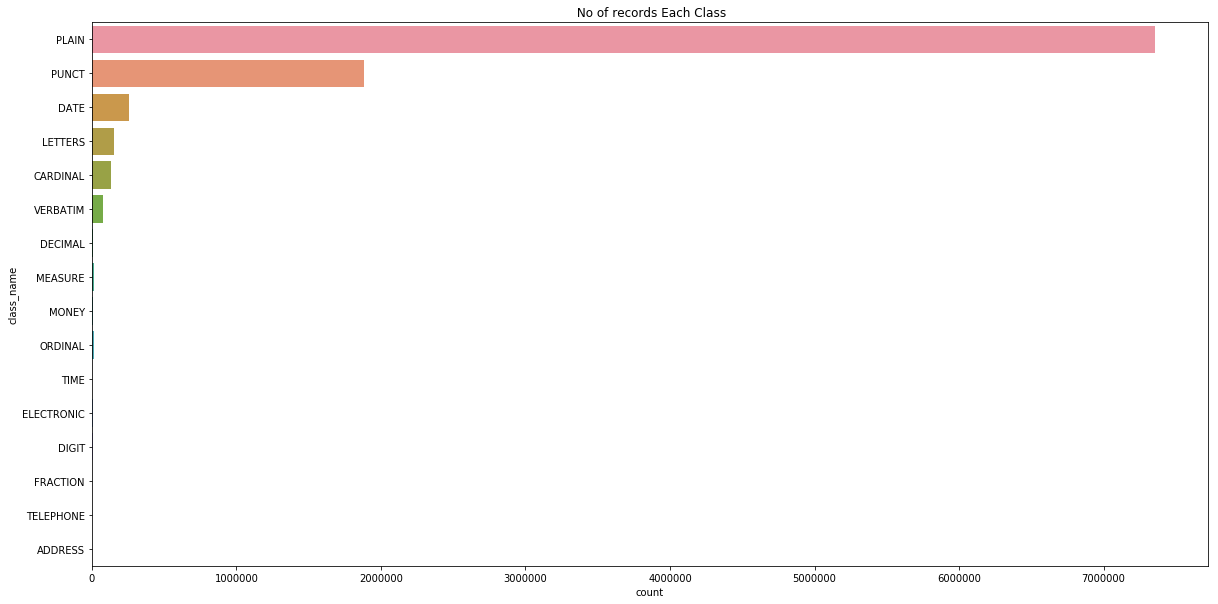

In [158]:
plt.figure(figsize=(20,10))

sns.countplot(y=data.class_name)
plt.title(" No of records Each Class")
plt.show()

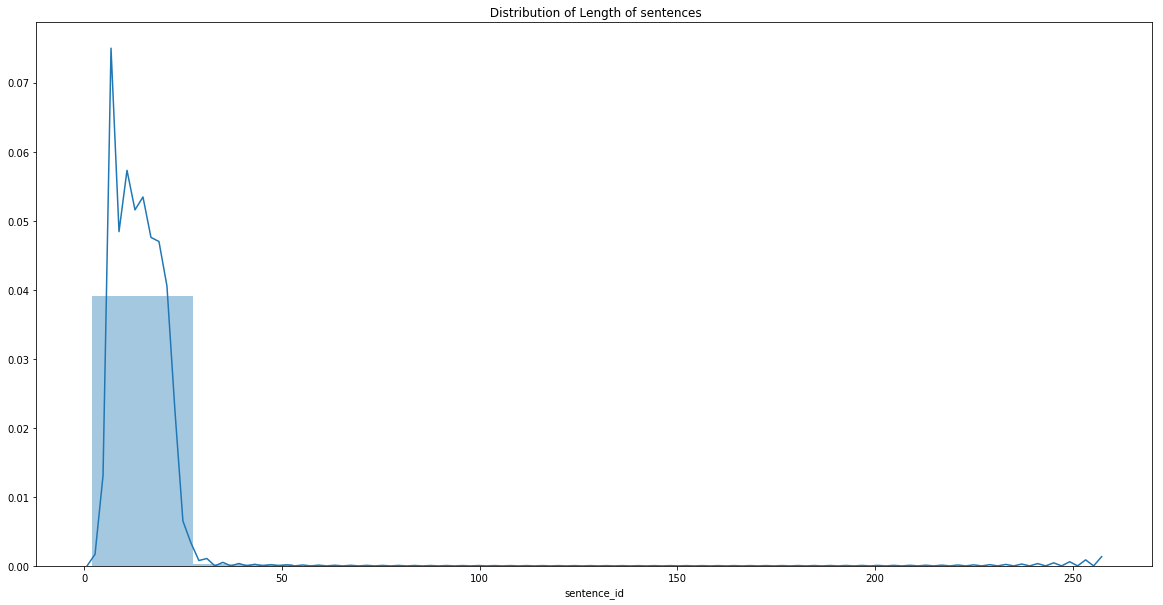

In [159]:
sen_len=data.groupby(['sentence_id'])['sentence_id'].count()
plt.figure(figsize=(20,10))
plt.title(" Distribution of Length of sentences")
sns.distplot(sen_len,bins=10,hist=True)
plt.show()

##  Overall  Approach to Problem


1. **Build classifier model to classifiy Text category** . 

2. **Use regex function to convert 'before' test to 'after' corrected text according to classified category**.

#### External Libraries for Conversion 

1. re  - finding and replacing patterns
2. inflect - Correctly generate plurals, singular nouns, ordinals, indefinite articles; convert numbers to words.
3. num2words - Numeric data to word format







## Feature Engineering for classification


In [160]:
data.dtypes

sentence_id     int64
token_id        int64
class_name     object
before         object
after          object
dtype: object

In [161]:

data["num_of_commas"]=data.before.apply(lambda x:str(x).count(','))
data["num_of_question_mark"]=data.before.apply(lambda x:str(x).count('?'))
data["num_of_amper"]=data.before.apply(lambda x:str(x).count('&'))
data["num_of_dollar"]=data.before.apply(lambda x:str(x).count('$'))
data["num_of_hashtag"]=data.before.apply(lambda x:str(x).count('#'))
data["num_of_exclamation"]=data.before.apply(lambda x:str(x).count('!'))
data["num_of_dot"]=data.before.apply(lambda x:str(x).count('.'))
data["num_of_backslash"]=data.before.apply(lambda x:str(x).count('\\'))
data["num_of_forwardslah"]=data.before.apply(lambda x:str(x).count('/'))
data["num_of_dash"]=data.before.apply(lambda x:str(x).count('-'))
data["num_of_underscore"]=data.before.apply(lambda x:str(x).count('_'))
data["num_of_plus"]=data.before.apply(lambda x:str(x).count('+'))
data["num_of_star"]=data.before.apply(lambda x:str(x).count('*'))

data["num_of_at"]=data.before.apply(lambda x:str(x).count('@'))
data["num_of_percentage"]=data.before.apply(lambda x:str(x).count('%'))
data["num_of_semicolon"]=data.before.apply(lambda x:str(x).count(';'))
data["num_of_colon"]=data.before.apply(lambda x:str(x).count(':'))
data["num_of_square_brackets"]=data.before.apply(lambda x:str(x).count('[')+str(x).count(']'))
data["num_of_cur_brackets"]=data.before.apply(lambda x:str(x).count('{')+str(x).count('}'))
data["num_of_angular_brackets"]=data.before.apply(lambda x:str(x).count('(')+str(x).count(')'))
data["num_of_inverted_commas"]=data.before.apply(lambda x:str(x).count('\"'))
data["num_of_inverted_comma_single"]=data.before.apply(lambda x:str(x).count('\''))
                                                                    

                                                                       
                                                                       

In [162]:
data.head()

,sentence_id,token_id,class_name,before,after,num_of_commas,num_of_question_mark,num_of_amper,num_of_dollar,num_of_hashtag,...,num_of_star,num_of_at,num_of_percentage,num_of_semicolon,num_of_colon,num_of_square_brackets,num_of_cur_brackets,num_of_angular_brackets,num_of_inverted_commas,num_of_inverted_comma_single
0,0,0,PLAIN,Brillantaisia,Brillantaisia,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,PLAIN,is,is,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,PLAIN,a,a,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,PLAIN,genus,genus,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,PLAIN,of,of,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
data.groupby('class_name').sum()

,sentence_id,token_id,num_of_commas,num_of_question_mark,num_of_amper,num_of_dollar,num_of_hashtag,num_of_exclamation,num_of_dot,num_of_backslash,...,num_of_star,num_of_at,num_of_percentage,num_of_semicolon,num_of_colon,num_of_square_brackets,num_of_cur_brackets,num_of_angular_brackets,num_of_inverted_commas,num_of_inverted_comma_single
class_name,,,,,,,,,,,,,,,,,,,,,
ADDRESS,194764915,4200,2,0,0,0,0,0,32,0,...,0,0,0,0,0,0,0,0,0,0
CARDINAL,50433779354,1064760,9006,0,0,0,0,0,185,0,...,0,0,0,0,104,0,0,0,0,6
DATE,96032959497,1693124,40464,0,0,0,0,0,1315,0,...,0,0,0,0,0,0,0,0,0,313
DECIMAL,3590752113,85398,262,0,0,0,0,0,9151,0,...,0,0,0,0,0,0,0,0,0,0
DIGIT,2084215503,48576,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ELECTRONIC,1956245931,31453,18,0,0,0,102,0,7172,0,...,0,0,46,7,1153,0,0,30,0,5
FRACTION,458580052,9092,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LETTERS,57830075807,1052615,31,0,856,0,0,0,63613,0,...,0,0,0,0,0,0,0,0,0,2119
MEASURE,5426017893,135396,919,0,0,0,0,0,5566,0,...,0,0,5651,0,0,0,0,0,172,87


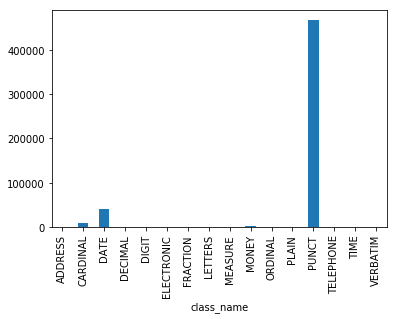

In [164]:
data.groupby('class_name')['num_of_commas'].sum().plot.bar()

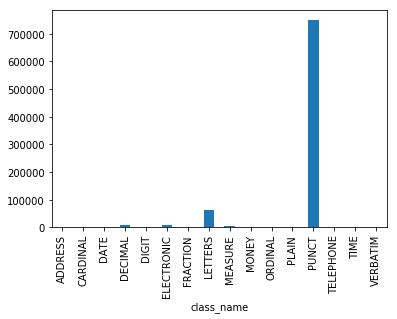

In [165]:
data.groupby('class_name')['num_of_dot'].sum().plot.bar()
plt.show()

## Lets add more features 

1. Count of uppercase letters 
2. count of lowercase letters 
3. Count of Numbers 

4. Length of words
5. Number of spaces in words
6. Is word a title




In [166]:

def countUppercase(s):
    count2=0
    
    for i in s:
        if(i.isupper()):
            count2=count2+1
    return count2
def countlowercasechars(s):
    count1=0
   
    for i in s:
        if(i.islower()):
            count1=count1+1
            
       
    return count1


def numbercount(s):
    cn=0
    for i in s:
        if (i.isnumeric()):
            cn+=1
    return cn

In [167]:
data['num_uppercase']=data.before.apply(lambda x:countUppercase(str(x)))
data['num_lowercase']=data.before.apply(lambda x:countlowercasechars(str(x)))
data['num_numeric_count']=data.before.apply(lambda x:numbercount(str(x)))
data['word_length']=data.before.apply(lambda x:len(str(x)))


### Patterns 

1. Numbers followed by words 
2. Words starts with $ or £
3. Date format count 27-10 or 27/10
4. pattern single alphabet followed by digits 
5. find pattern digits seperated by dot
6. Time format e.g 12:30

In [168]:

# find pattern digits followed by alphabets  
re.findall('\d+\S\w+',"6ft  12th 12 km")

['6ft', '12th']

In [169]:
re.findall('^[\$\£\€]',"€300")

['€']

In [170]:
re.findall('\d+-\d+',"27-10-1990")

['27-10']

In [171]:
re.findall('\d+\/\d+',"27/10/1990")

['27/10']

In [172]:
# find pattern single alphabet followed by digits 
re.findall('\d{1}\d+',"A12")

['12']

In [173]:
# find pattern digits seperated by dot
re.findall('\d*.\d+',"1.35")

['1.35']

In [174]:
# find pattern digits seperated by dot
re.findall('\d+:\d+',"12:35")

['12:35']

In [175]:
"andosdo@gmail.com".count(".com")

1

In [176]:
data['pattern_digits_followedby_aplh']=data.before.apply(lambda x:len(re.findall('\d+\S\w+',str(x))))
data['start_with_dollar']=data.before.apply(lambda x:len(re.findall('^[\$\£\€]',str(x))))
data['digits_sep_dash']=data.before.apply(lambda x:len(re.findall('\d+-\d+',str(x))))
data['digits_sep_slash']=data.before.apply(lambda x:len(re.findall('\d+\/\d+',str(x))))
data['fraction_pattern']=data.before.apply(lambda x:len(re.findall('\d*.\d+',str(x))))

data['time_pattern']=data.before.apply(lambda x:len(re.findall('\d+:\d+',str(x))))
data['email_pattern']=data.before.apply(lambda x:str(x).count(".com"))
data['address_pattern']=data.before.apply(lambda x:len(re.findall('\d{1}\d+',str(x))))                                    
                                       
                                       

In [177]:
target_words=data.after


In [178]:
y=data.class_name

In [179]:
data.drop(['class_name','sentence_id','token_id','after','before'],axis=1,inplace=True)

In [205]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,f1_score,auc,classification_report,roc_auc_score

from sklearn.preprocessing import LabelEncoder


In [181]:
lb=LabelEncoder()
y=lb.fit_transform(y)


In [193]:


X=data.values

In [194]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [195]:
X_train.shape

(7934752, 34)

In [196]:
y_train.shape

(7934752,)

In [199]:

from sklearn.ensemble import RandomForestClassifier
rt=RandomForestClassifier()
rt.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [200]:
y_pred=rt.predict(X_test)

In [201]:
accuracy_score(y_pred,y_test)

0.9869541041967768

In [208]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       102
           1       0.93      0.96      0.94     25566
           2       1.00      0.97      0.99     52728
           3       0.96      0.98      0.97      1919
           4       0.09      0.91      0.16       107
           5       0.99      1.00      0.99       947
           6       0.96      1.00      0.98       247
           7       0.84      0.83      0.83     31195
           8       0.96      0.96      0.96      2929
           9       0.98      0.99      0.99      1177
          10       0.87      0.97      0.92      2283
          11       1.00      0.99      0.99   1477194
          12       0.99      1.00      1.00    374480
          13       0.95      0.97      0.96       767
          14       0.84      0.99      0.91       254
          15       0.47      0.62      0.54     11794

    accuracy                           0.99   1983689
   macro avg       0.86   

In [209]:
tr_dt=data


## Class Prediction Test Data

Load Test data Perform same transformation and predict class. 

In [263]:
data=pd.read_csv("en_test_2.csv")

In [264]:



data["num_of_commas"]=data.before.apply(lambda x:str(x).count(','))
data["num_of_question_mark"]=data.before.apply(lambda x:str(x).count('?'))
data["num_of_amper"]=data.before.apply(lambda x:str(x).count('&'))
data["num_of_dollar"]=data.before.apply(lambda x:str(x).count('$'))
data["num_of_hashtag"]=data.before.apply(lambda x:str(x).count('#'))
data["num_of_exclamation"]=data.before.apply(lambda x:str(x).count('!'))
data["num_of_dot"]=data.before.apply(lambda x:str(x).count('.'))
data["num_of_backslash"]=data.before.apply(lambda x:str(x).count('\\'))
data["num_of_forwardslah"]=data.before.apply(lambda x:str(x).count('/'))
data["num_of_dash"]=data.before.apply(lambda x:str(x).count('-'))
data["num_of_underscore"]=data.before.apply(lambda x:str(x).count('_'))
data["num_of_plus"]=data.before.apply(lambda x:str(x).count('+'))
data["num_of_star"]=data.before.apply(lambda x:str(x).count('*'))

data["num_of_at"]=data.before.apply(lambda x:str(x).count('@'))
data["num_of_percentage"]=data.before.apply(lambda x:str(x).count('%'))
data["num_of_semicolon"]=data.before.apply(lambda x:str(x).count(';'))
data["num_of_colon"]=data.before.apply(lambda x:str(x).count(':'))
data["num_of_square_brackets"]=data.before.apply(lambda x:str(x).count('[')+str(x).count(']'))
data["num_of_cur_brackets"]=data.before.apply(lambda x:str(x).count('{')+str(x).count('}'))
data["num_of_angular_brackets"]=data.before.apply(lambda x:str(x).count('(')+str(x).count(')'))
data["num_of_inverted_commas"]=data.before.apply(lambda x:str(x).count('\"'))
data["num_of_inverted_comma_single"]=data.before.apply(lambda x:str(x).count('\''))

In [265]:
data['num_uppercase']=data.before.apply(lambda x:countUppercase(str(x)))
data['num_lowercase']=data.before.apply(lambda x:countlowercasechars(str(x)))
data['num_numeric_count']=data.before.apply(lambda x:numbercount(str(x)))
data['word_length']=data.before.apply(lambda x:len(str(x)))

data['pattern_digits_followedby_aplh']=data.before.apply(lambda x:len(re.findall('\d+\S\w+',str(x))))
data['start_with_dollar']=data.before.apply(lambda x:len(re.findall('^[\$\£\€]',str(x))))
data['digits_sep_dash']=data.before.apply(lambda x:len(re.findall('\d+-\d+',str(x))))
data['digits_sep_slash']=data.before.apply(lambda x:len(re.findall('\d+\/\d+',str(x))))
data['fraction_pattern']=data.before.apply(lambda x:len(re.findall('\d*.\d+',str(x))))

data['time_pattern']=data.before.apply(lambda x:len(re.findall('\d+:\d+',str(x))))
data['email_pattern']=data.before.apply(lambda x:str(x).count(".com"))
data['address_pattern']=data.before.apply(lambda x:len(re.findall('\d{1}\d+',str(x))))     

In [266]:


sentence_id=data.sentence_id
token_id=data.token_id

source_word=data.before


In [267]:
data.drop(['sentence_id','token_id','before'],axis=1,inplace=True)

In [268]:


Xt=data.values

In [269]:


y=rt.predict(Xt)

In [270]:
lb.classes_

array(['ADDRESS', 'CARDINAL', 'DATE', 'DECIMAL', 'DIGIT', 'ELECTRONIC',
       'FRACTION', 'LETTERS', 'MEASURE', 'MONEY', 'ORDINAL', 'PLAIN',
       'PUNCT', 'TELEPHONE', 'TIME', 'VERBATIM'], dtype=object)

In [271]:


class_names=lb.inverse_transform(y)

In [272]:
class_names

array(['PLAIN', 'PLAIN', 'DATE', ..., 'PLAIN', 'PUNCT', 'PUNCT'],
      dtype=object)

In [ ]:
target_words=[]

for i in range(len(class_names)):
    
    if class_names[i]=='PLAIN':
        target_words.append(source_word[i])
    elif class_names[i]=='PUNCT':
        target_words.append(source_word[i])
    elif class_names[i]=='ADDRESS':
        target_words.append(address(source_word[i]))
    elif class_names[i]=='CARDINAL':
        target_words.append(cardinal(source_word[i]))
    elif class_names[i]=='DATE':
        target_words.append(date2word(source_word[i]))
    elif class_names[i]=='DECIMAL':
        target_words.append(float2word(source_word[i]))
    elif class_names[i]=='ELECTRONIC':
        target_words.append(electronic(source_word[i]))
    elif class_names[i]=='FRACTION':
        target_words.append(fraction(source_word[i]))
    elif class_names[i]=='LETTERS':
        target_words.append(letters(source_word[i]))
    elif class_names[i]=='TELEPHONE':
        target_words.append(telephone(source_word[i]))
    elif class_names[i]=='ORDINAL':
        target_words.append(ordinal(source_word[i]))
    elif class_names[i]=='TIME':
        target_words.append(source_word[i])
    elif class_names[i]=='VERBATIM':
        target_words.append(source_word[i])
    elif class_names[i]=='MEASURE':
        target_words.append(measure2word(source_word[i]))
    elif class_names[i]=='MONEY':
        target_words.append(money(source_word[i]))
    else:
        target_words.append(source_word[i])

In [274]:


idlist=[]


In [275]:
idlist=[str(""+str(e[0])+"_"+str(e[1])) for e in list(zip(sentence_id,token_id))]
    


In [276]:
len(target_words)

956046

In [277]:
len(idlist)

956046

In [278]:


td=pd.DataFrame({'id':idlist,'after':target_words})
td.head()

,id,after
0,0_0,Last
1,0_1,modified
2,0_2,2016-03-31
3,0_3,.
4,1_0,There's


In [279]:
td.to_csv("submission2.csv",index=False)





![alt text](score.jpg "Title")

In [248]:
import gc

In [249]:
gc.collect()

Exception ignored in: <function DMatrix.__del__ at 0x0000015CA1BE6E18>
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\xgboost\core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


13446

In [222]:
def letters(x):
    try:
        x = re.sub('[^a-zA-Z]', '', x)
        x = x.lower()
        result_string = ''
        for i in range(len(x)):
            result_string = result_string + x[i] + ' '
        return(result_string.strip())  
    except:
        return x

In [226]:

# helper functions to convert data to correct format

p = inflect.engine()

def is_num(key):
    if is_float(key) or re.match(r'^-?[0-9]\d*?$', key.replace(',','')): return True
    else: return False

def is_float(string):
    try:
        return float(string.replace(',','')) and "." in string # True if string is a number contains a dot
    except ValueError:  # String is not a number
        return False

def float2word(key):
    try:
        key = float(key.replace(',',''))
        key = p.number_to_words(key,decimal='point',andword='', zero='o')
        if 'o' == key.split()[0]:
            key = key[2:]
        key = key.replace('-',' ').replace(',','')
        return key.lower()
    except:
        return key

#Comprehensive list of all measures
dict_m = {'"': 'inches', "'": 'feet', 'km/s': 'kilometers per second', 'AU': 'units', 'BAR': 'bars', 'CM': 'centimeters', 'mm': 'millimeters', 'FT': 'feet', 'G': 'grams', 
     'GAL': 'gallons', 'GB': 'gigabytes', 'GHZ': 'gigahertz', 'HA': 'hectares', 'HP': 'horsepower', 'HZ': 'hertz', 'KM':'kilometers', 'km3': 'cubic kilometers',
     'KA':'kilo amperes', 'KB': 'kilobytes', 'KG': 'kilograms', 'KHZ': 'kilohertz', 'KM²': 'square kilometers', 'KT': 'knots', 'KV': 'kilo volts', 'M': 'meters',
      'KM2': 'square kilometers','Kw':'kilowatts', 'KWH': 'kilo watt hours', 'LB': 'pounds', 'LBS': 'pounds', 'MA': 'mega amperes', 'MB': 'megabytes',
     'KW': 'kilowatts', 'MPH': 'miles per hour', 'MS': 'milliseconds', 'MV': 'milli volts', 'kJ':'kilojoules', 'km/h': 'kilometers per hour',  'V': 'volts', 
     'M2': 'square meters', 'M3': 'cubic meters', 'MW': 'megawatts', 'M²': 'square meters', 'M³': 'cubic meters', 'OZ': 'ounces',  'MHZ': 'megahertz', 'MI': 'miles',
     'MB/S': 'megabytes per second', 'MG': 'milligrams', 'ML': 'milliliters', 'YD': 'yards', 'au': 'units', 'bar': 'bars', 'cm': 'centimeters', 'ft': 'feet', 'g': 'grams', 
     'gal': 'gallons', 'gb': 'gigabytes', 'ghz': 'gigahertz', 'ha': 'hectares', 'hp': 'horsepower', 'hz': 'hertz', 'kWh': 'kilo watt hours', 'ka': 'kilo amperes', 'kb': 'kilobytes', 
     'kg': 'kilograms', 'khz': 'kilohertz', 'km': 'kilometers', 'km2': 'square kilometers', 'km²': 'square kilometers', 'kt': 'knots','kv': 'kilo volts', 'kw': 'kilowatts', 
     'lb': 'pounds', 'lbs': 'pounds', 'm': 'meters', 'm2': 'square meters','m3': 'cubic meters', 'ma': 'mega amperes', 'mb': 'megabytes', 'mb/s': 'megabytes per second', 
     'mg': 'milligrams', 'mhz': 'megahertz', 'mi': 'miles', 'ml': 'milliliters', 'mph': 'miles per hour','ms': 'milliseconds', 'mv': 'milli volts', 'mw': 'megawatts', 'm²': 'square meters',
     'm³': 'cubic meters', 'oz': 'ounces', 'v': 'volts', 'yd': 'yards', 'µg': 'micrograms', 'ΜG': 'micrograms', 'kg/m3': 'kilograms per meter cube'}

def measure2word(key):
    try:
        unit = dict_m[key.split()[-1]]
        val = key.split()[0]
        if is_num(val):
            val = num2word(val)
            text = val + ' ' + unit
        else: text = key
        return text
    except:
        return key

def cardinal(x):
    try:
        if re.match('.*[A-Za-z]+.*', x):
            return x
        x = re.sub(',', '', x, count = 10)

        if(re.match('.+\..*', x)):
            x = p.number_to_words(float(x))
        elif re.match('\..*', x): 
            x = p.number_to_words(float(x))
            x = x.replace('zero ', '', 1)
        else:
            x = p.number_to_words(int(x))
        x = x.replace('zero', 'o')    
        x = re.sub('-', ' ', x, count=10)
        x = re.sub(' and','',x, count = 10)
        return x
    except:
        return x

def rom_to_int(string):

    table=[['M',1000],['CM',900],['D',500],['CD',400],['C',100],['XC',90],['L',50],['XL',40],['X',10],['IX',9],['V',5],['IV',4],['I',1]]
    returnint=0
    for pair in table:


        continueyes=True

        while continueyes:
            if len(string)>=len(pair[0]):

                if string[0:len(pair[0])]==pair[0]:
                    returnint+=pair[1]
                    string=string[len(pair[0]):]

                else: continueyes=False
            else: continueyes=False

    return returnint    
def ordinal(x):
    try:
        result_string = ''
        x = x.replace(',', '')
        x = x.replace('[\.]$', '')
        if re.match('^[0-9]+$',x):
            x = num2words(int(x), ordinal=True)
            return(x.replace('-', ' '))
        if re.match('.*V|X|I|L|D',x):
            if re.match('.*th|st|nd|rd',x):
                x = x[0:len(x)-2]
                x = rom_to_int(x)
                result_string = re.sub('-', ' ',  num2words(x, ordinal=True))
            else:
                x = rom_to_int(x)
                result_string = 'the '+ re.sub('-', ' ',  num2words(x, ordinal=True))
        else:
            x = x[0:len(x)-2]
            result_string = re.sub('-', ' ',  num2words(float(x), ordinal=True))
        return(result_string)  
    except:
        return x




def address(x):
    try:
        x = re.sub('[^0-9a-zA-Z]+', '', x)
        result_string = ''
        for i in range(0,len(x)):
            if re.match('[A-Z]|[a-z]',x[i]):
                result_string = result_string + plain(x[i]).lower() + ' '
            else:
                result_string = result_string + cardinal(x[i]) + ' '
                
        return(result_string.strip())        
    except:    
        return(x)  

def telephone(x):
    try:
        result_string = ''
        print(len(x))
        for i in range(0,len(x)):
            if re.match('[0-9]+', x[i]):
                result_string = result_string + cardinal(x[i]) + ' '
            else:
                result_string = result_string + 'sil '
        return result_string.strip()    
    except:    
        return(x)  

def electronic(x):
    try:
        replacement = {'.' : 'dot', ':' : 'colon', '/':'slash', '-' : 'dash', '#' : 'hash tag', }
        result_string = ''
        if re.match('.*[A-Za-z].*', x):
            for char in x:
                if re.match('[A-Za-z]', char):
                    result_string = result_string + letters(char) + ' '
                elif char in replacement:
                    result_string = result_string + replacement[char] + ' '
                elif re.match('[0-9]', char):
                    if char == 0:
                        result_string = result_string + 'o '
                    else:
                        number = cardinal(char)
                        for n in number:
                            result_string = result_string + n + ' ' 
            return result_string.strip()                
        else:
            return(x)
    except:    
        return(x)


def fraction(x):
    try:
        y = x.split('/')
        result_string = ''
        y[0] = cardinal(y[0])
        y[1] = ordinal(y[1])
        if y[1] == 4:
            result_string = y[0] + ' quarters'
        else:    
            result_string = y[0] + ' ' + y[1] + 's'
        return(result_string)
    except:    
        return(x)

def money(x):
    try:
        if re.match('^\$', x):
            x = x.replace('$','')
            if len(x.split(' ')) == 1:
                if re.match('.*M|m$',x):
                    x = x.replace('M', '')
                    x = x.replace('m', '')
                    text = cardinal(x)
                    x = text + ' million dollars'
                elif re.match('.*b|B$', x):
                    x = x.replace('B', '')
                    x = x.replace('b', '')
                    text = cardinal(x)
                    x = text + ' million dollars'
                else:
                    text = cardinal(x)
                    x = text + ' dollars'
                return x.lower()
            elif len(x.split(' ')) == 2:
                text = cardinal(x.split(' ')[0])
                if x.split(' ')[1].lower() == 'million':
                    x = text + ' million dollars'
                elif x.split(' ')[1].lower() == 'billion':
                    x = text + ' billion dollars'
                return x.lower()
                
                
                
        if re.match('^US\$', x):
            x = x.replace('US$','')
            if len(x.split(' ')) == 1:
                if re.match('.*M|m$', x):
                    x = x.replace('M', '')
                    x = x.replace('m', '')
                    text = cardinal(x)
                    x = text + ' million dollars'
                elif re.match('.*b|B$', x):
                    x = x.replace('b', '')
                    x = x.replace('B', '')
                    text = cardinal(x)
                    x = text + ' million dollars'
                else:
                    text = cardinal(x)
                    x = text + ' dollars'
                return x.lower()
            elif len(x.split(' ')) == 2:
                text = cardinal(x.split(' ')[0])
                if x.split(' ')[1].lower() == 'million':
                    x = text + ' million dollars'
                elif x.split(' ')[1].lower() == 'billion':
                    x = text + ' billion dollars'
                return x.lower()

        elif re.match('^£', x):
            x = x.replace('£','')
            if len(x.split(' ')) == 1:
                if re.match('.*M|m$', x):
                    x = x.replace('M', '')
                    x = x.replace('m', '')
                    text = cardinal(x)
                    x = text + ' million pounds'
                elif re.match('.*b|B$', x):
                    x = x.replace('b', '')
                    x = x.replace('B', '')
                    text = cardinal(x)
                    x = text + ' million pounds'
                else:
                    text = cardinal(x)
                    x = text + ' pounds'
                return x.lower()
            elif len(x.split(' ')) == 2:
                text = cardinal(x.split(' ')[0])
                if x.split(' ')[1].lower() == 'million':
                    x = text + ' million pounds'
                elif x.split(' ')[1].lower() == 'billion':
                    x = text + ' billion pounds'
                return x.lower()
            
        elif re.match('^€', x):
            x = x.replace('€','')
            if len(x.split(' ')) == 1:
                if re.match('.*M|m$', x):
                    x = x.replace('M', '')
                    x = x.replace('m', '')
                    text = cardinal(x)
                    x = text + ' million euros'
                elif re.match('.*b|B$', x):
                    x = x.replace('B', '')
                    x = x.replace('b', '')
                    text = cardinal(x)
                    x = text + ' million euros'
                else:
                    text = cardinal(x)
                    x = text + ' euros'
                return x.lower()
            elif len(x.split(' ')) == 2:
                text = cardinal(x.split(' ')[0])
                if x.split(' ')[1].lower() == 'million':
                    x = text + ' million euros'
                elif x.split(' ')[1].lower() == 'billion':
                    x = text + ' billion euros'
                return x.lower()  
    except:    
        return(x)

def digit(x): 
    try:
        x = re.sub('[^0-9]', '',x)
        result_string = ''
        for i in x:
            result_string = result_string + cardinal(i) + ' '
        result_string = result_string.strip()
        return result_string
    except:
        return(x) 

dict_mon = {'jan': "January", "feb": "February", "mar ": "march", "apr": "april", "may": "may ","jun": "june", "jul": "july", "aug": "august","sep": "september",
            "oct": "october","nov": "november","dec": "december", "january":"January", "february":"February", "march":"march","april":"april", "may": "may", 
            "june":"june","july":"july", "august":"august", "september":"september", "october":"october", "november":"november", "december":"december"}

def date2word(key):
    v =  key.split('-')
    if len(v)==3:
        if v[1].isdigit():
            try:
                date = datetime.strptime(key , '%Y-%m-%d')
                text = 'the '+ p.ordinal(p.number_to_words(int(v[2]))).replace('-',' ')+' of '+datetime.date(date).strftime('%B')
                if int(v[0])>=2000 and int(v[0]) < 2010:
                    text = text  + ' '+digit2word(v[0])
                else: 
                    text = text + ' ' + digit2word(v[0][0:2]) + ' ' + digit2word(v[0][2:])
            except:
                text = key
            return text.lower()    
    else:   
        v = re.sub(r'[^\w]', ' ', key).split()
        if v[0].isalpha():
            try:
                if len(v)==3:
                    text = dict_mon[v[0].lower()] + ' '+ p.ordinal(p.number_to_words(int(v[1]))).replace('-',' ')
                    if int(v[2])>=2000 and int(v[2]) < 2010:
                        text = text  + ' '+digit2word(v[2])
                    else: 
                        text = text + ' ' + digit2word(v[2][0:2]) + ' ' + digit2word(v[2][2:])   
                elif len(v)==2:

                    if int(v[1])>=2000 and int(v[1]) < 2010:
                        text = dict_mon[v[0].lower()]  + ' '+ digit2word(v[1])
                    else: 
                        if len(v[1]) <=2:
                            text = dict_mon[v[0].lower()] + ' ' + digit2word(v[1])
                        else:
                            text = dict_mon[v[0].lower()] + ' ' + digit2word(v[1][0:2]) + ' ' + digit2word(v[1][2:])
                else: text = key
            except: text = key
            return text.lower()
        else: 
            key = re.sub(r'[^\w]', ' ', key)
            v = key.split()
            try:
                date = datetime.strptime(key , '%d %b %Y')
                text = 'the '+ p.ordinal(p.number_to_words(int(v[0]))).replace('-',' ')+' of '+ dict_mon[v[1].lower()]
                if int(v[2])>=2000 and int(v[2]) < 2010:
                    text = text  + ' '+digit2word(v[2])
                else: 
                    text = text + ' ' + digit2word(v[2][0:2]) + ' ' + digit2word(v[2][2:])
            except:
                try:
                    date = datetime.strptime(key , '%d %B %Y')
                    text = 'the '+ p.ordinal(p.number_to_words(int(v[0]))).replace('-',' ')+' of '+ dict_mon[v[1].lower()]
                    if int(v[2])>=2000 and int(v[2]) < 2010:
                        text = text  + ' '+digit2word(v[2])
                    else: 
                        text = text + ' ' + digit2word(v[2][0:2]) + ' ' + digit2word(v[2][2:])
                except:
                    try:
                        date = datetime.strptime(key , '%d %m %Y')
                        text = 'the '+ p.ordinal(p.number_to_words(int(v[0]))).replace('-',' ')+' of '+datetime.date(date).strftime('%B')
                        if int(v[2])>=2000 and int(v[2]) < 2010:
                            text = text  + ' '+digit2word(v[2])
                        else: 
                            text = text + ' ' + digit2word(v[2][0:2]) + ' ' + digit2word(v[2][2:])
                    except:
                        try:
                            date = datetime.strptime(key , '%d %m %y')
                            text = 'the '+ p.ordinal(p.number_to_words(int(v[0]))).replace('-',' ')+' of '+datetime.date(date).strftime('%B')
                            v[2] = datetime.date(date).strftime('%Y')
                            if int(v[2])>=2000 and int(v[2]) < 2010:
                                text = text  + ' '+digit2word(v[2])
                            else: 
                                text = text + ' ' + digit2word(v[2][0:2]) + ' ' + digit2word(v[2][2:])
                        except:text = key
            return text.lower()